# Importing Libraries

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from scipy.stats import powerlaw
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Loading Dataset

In [ ]:
df = pd.read_csv("nba_data_final_3.csv")
# df = pd.read_csv("nba_data.csv")
df.head()

name  games_played  minutes_played  points_scored  goals_scored  \
0   Brandon Ingram          36.0            27.4            7.4           2.6   
1  Andrew Harrison          35.0            26.9            7.2           2.0   
2   JaKarr Sampson          74.0            15.3            5.2           2.0   
3      Malik Sealy          58.0            11.6            5.7           2.3   
4      Matt Geiger          48.0            11.5            4.5           1.6   

   goals_attempted  3_point_scored  3_point_attempted  free_throws_scored  \
0              7.6             0.5                2.1                 1.6   
1              6.7             0.7                2.8                 2.6   
2              4.7             0.4                1.7                 0.9   
3              5.5             0.1                0.5                 0.9   
4              3.0             0.0                0.1                 1.3   

   free_throws_attempted  offensive_rebounds  defensive_rebounds  assists  \
0                    2.3                 0.7                 3.4      1.9   
1                    3.4                 0.5                 2.0      3.7   
2                    1.3                 0.5                 1.7      1.0   
3                    1.3                 1.0                 0.9      0.8   
4                    1.9                 1.0                 1.5      0.3   

   steals  blocks  turnover  5yrs  
0     0.4     0.4       1.3   0.0  
1     1.1     0.5       1.6   0.0  
2     0.5     0.3       1.0   0.0  
3     0.6     0.1       1.0   1.0  
4     0.3     0.4       0.8   1.0

# Preprocessing

## Checking for null values

In [ ]:
df.isna().sum()

name                       1
games_played               1
minutes_played             1
points_scored              1
goals_scored               1
goals_attempted            1
3_point_scored           702
3_point_attempted        702
free_throws_scored         1
free_throws_attempted      1
offensive_rebounds       458
defensive_rebounds       458
assists                    1
steals                   458
blocks                   458
turnover                 632
5yrs                       1
dtype: int64

## Dropping null values

In [ ]:
df.dropna(inplace = True)
df.shape

(1970, 17)

# EDA

## Checking for data distribution

<ipython-input-241-e1e95accf1e4>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, bins = 50)


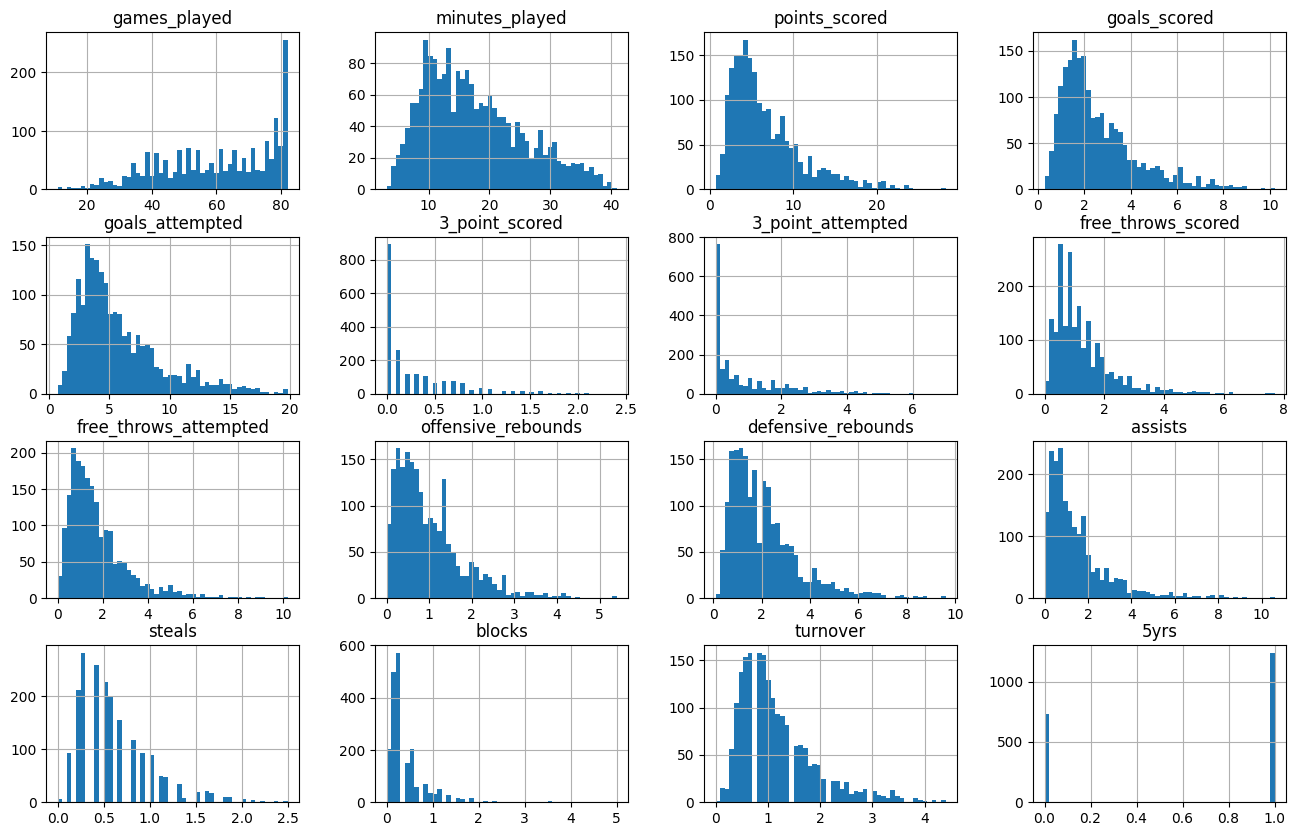

In [241]:
# EDA
# checking for data distribution
fig = plt.figure(figsize=(16, 10))
ax = plt.gca()
df.hist(ax = ax, bins = 50)
plt.show()

## Checking for data imbalance

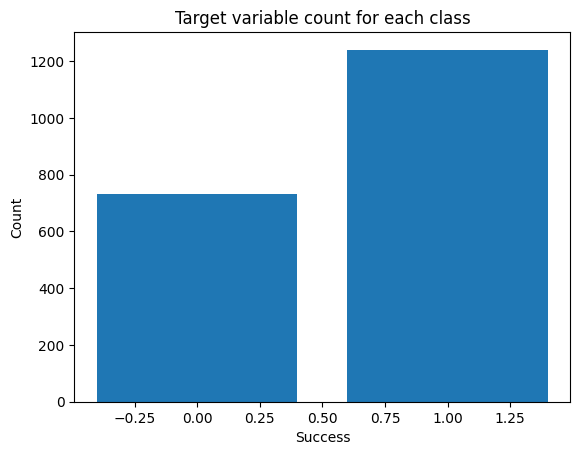

In [245]:
# checking for data imbalance
balance_check = pd.DataFrame(df['5yrs'].value_counts())
plt.bar(balance_check.index, balance_check['5yrs'])
plt.xlabel('Success')
plt.ylabel('Count')
plt.title('Target variable count for each class')
plt.show()

## Checking for the power-law distribution

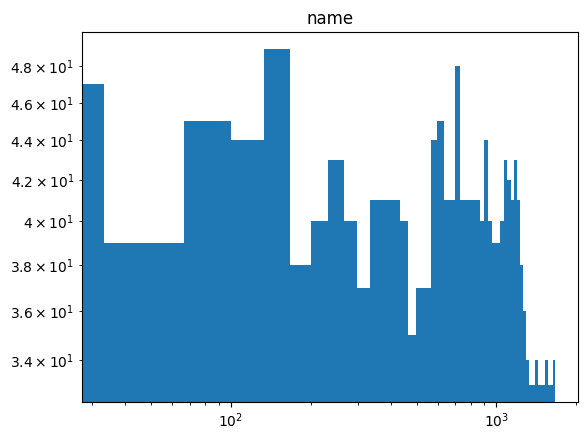

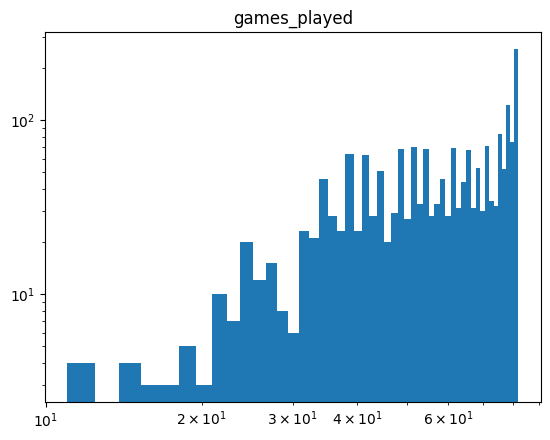

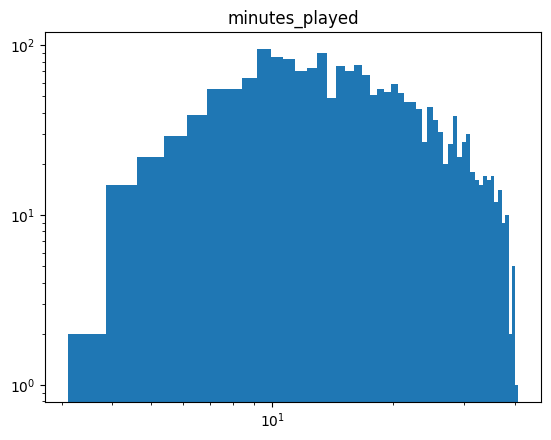

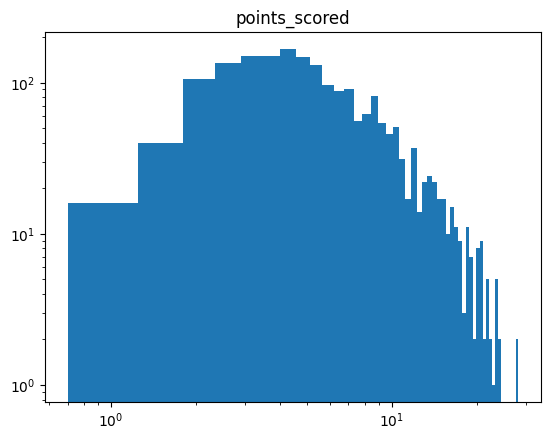

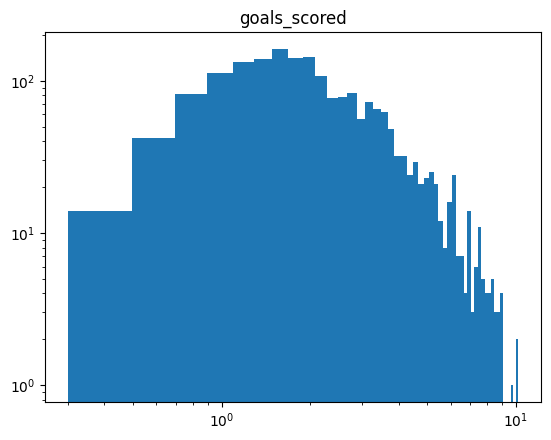

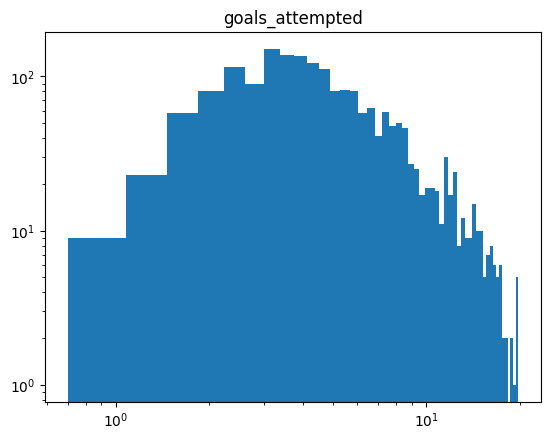

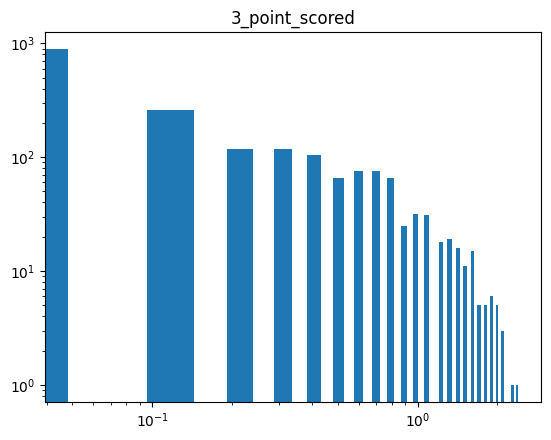

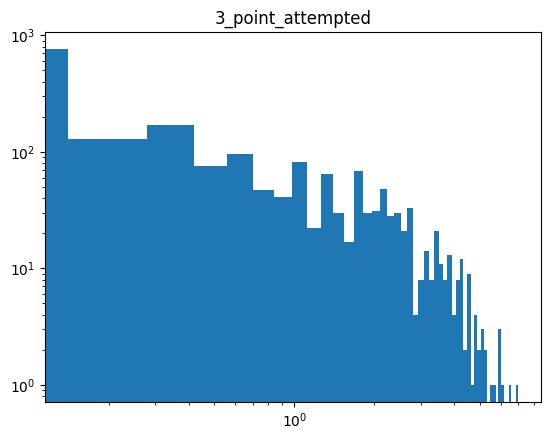

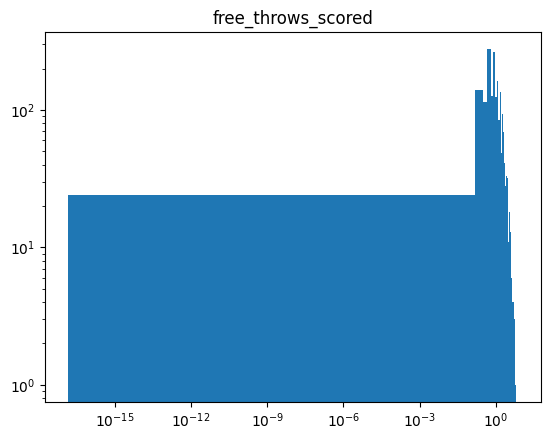

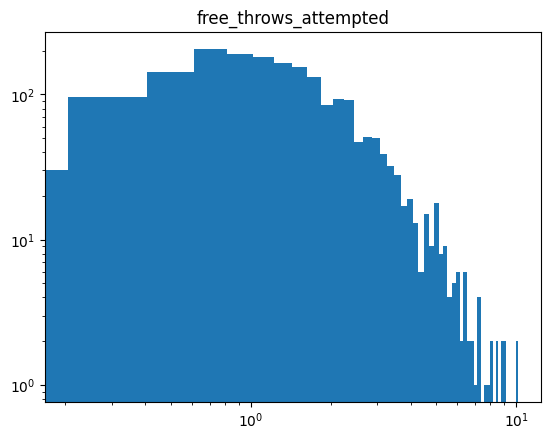

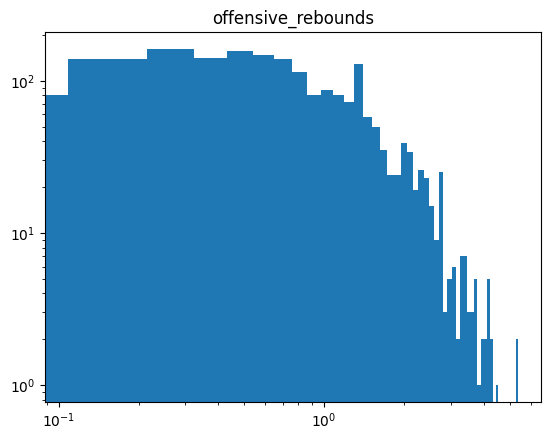

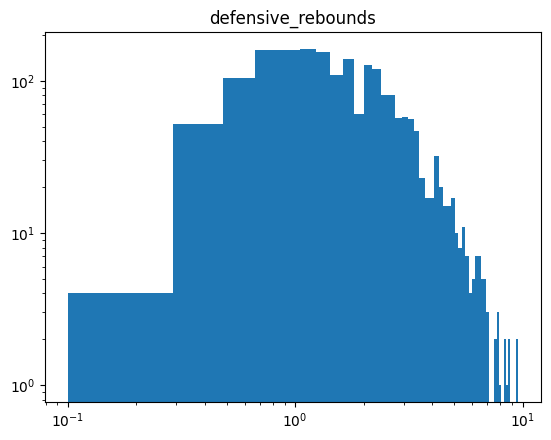

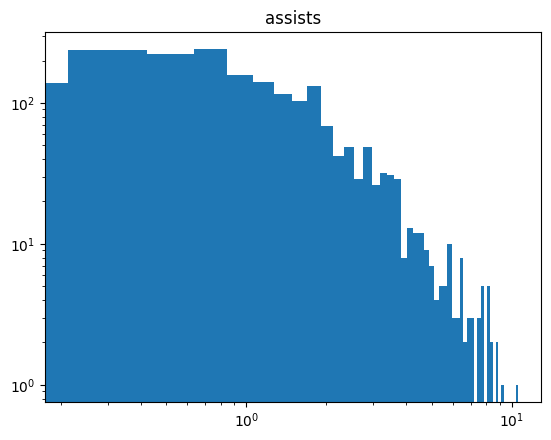

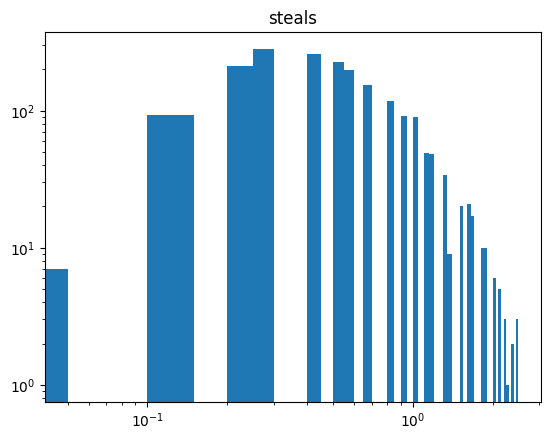

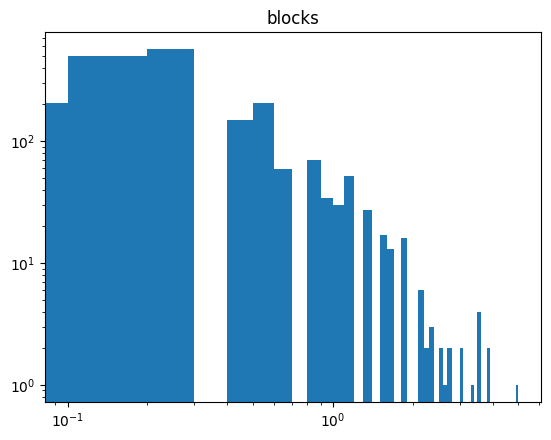

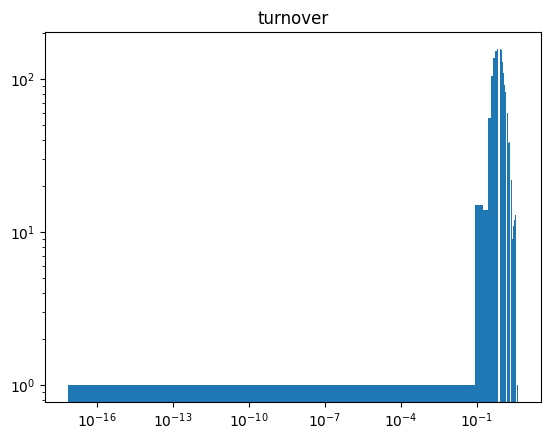

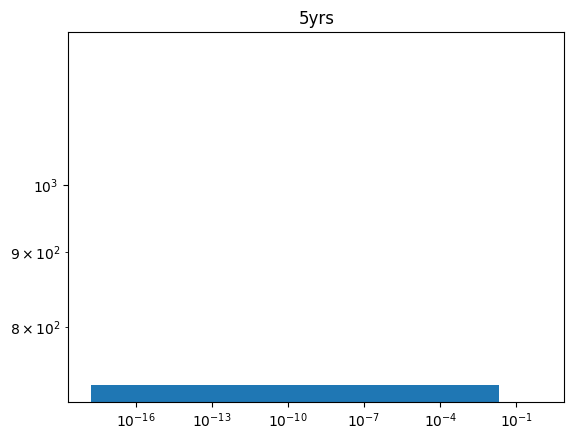

In [247]:
# Checking for the power-law distribution
for col in df.columns:  # exclude the target variable
    plt.figure()
    ax = plt.gca()
    plt.hist(df[col], bins=50)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(col)

## Defining methods to use for outlier analysis

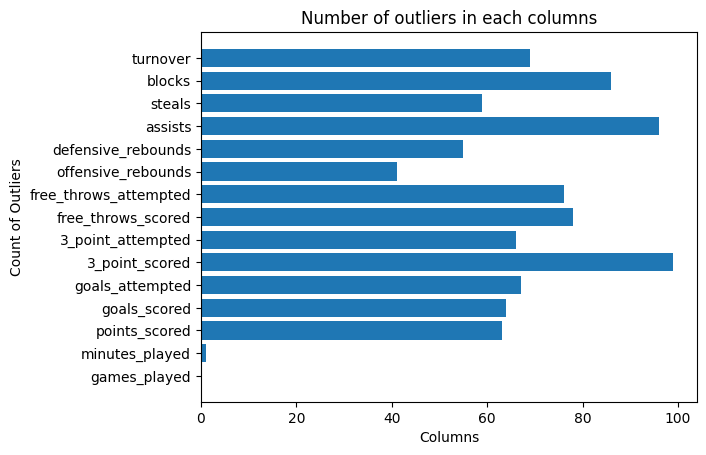

0
games_played            0
minutes_played          1
points_scored          63
goals_scored           64
goals_attempted        67
3_point_scored         99
3_point_attempted      66
free_throws_scored     78
free_throws_attempted  76
offensive_rebounds     41
defensive_rebounds     55
assists                96
steals                 59
blocks                 86
turnover               69

In [250]:
# defining methods to use for outlier analysis
def turkeys_method(col, df = df):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  column_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  return column_outliers

# For further outlier analysis implementing turkeys method.
outliers = {k:None for k in X_train.columns}
for c in X_train.columns:
  out = turkeys_method(c, X_train)
  outliers[c] = out.to_list()

out_df = pd.DataFrame.from_dict(outliers, orient='index').transpose()
out_df_count = pd.DataFrame(out_df.count())
plt.barh(out_df_count.index, out_df_count[0])
plt.xlabel('Columns')
plt.ylabel('Count of Outliers')
plt.title('Number of outliers in each columns')
plt.show()

display(out_df_count)

## Correalation

<ipython-input-257-5aa75ac0a47d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


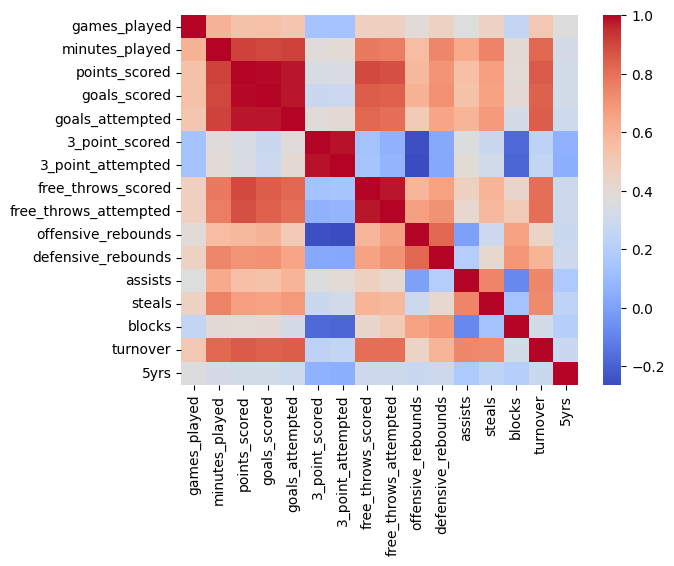

In [257]:
# correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.show()

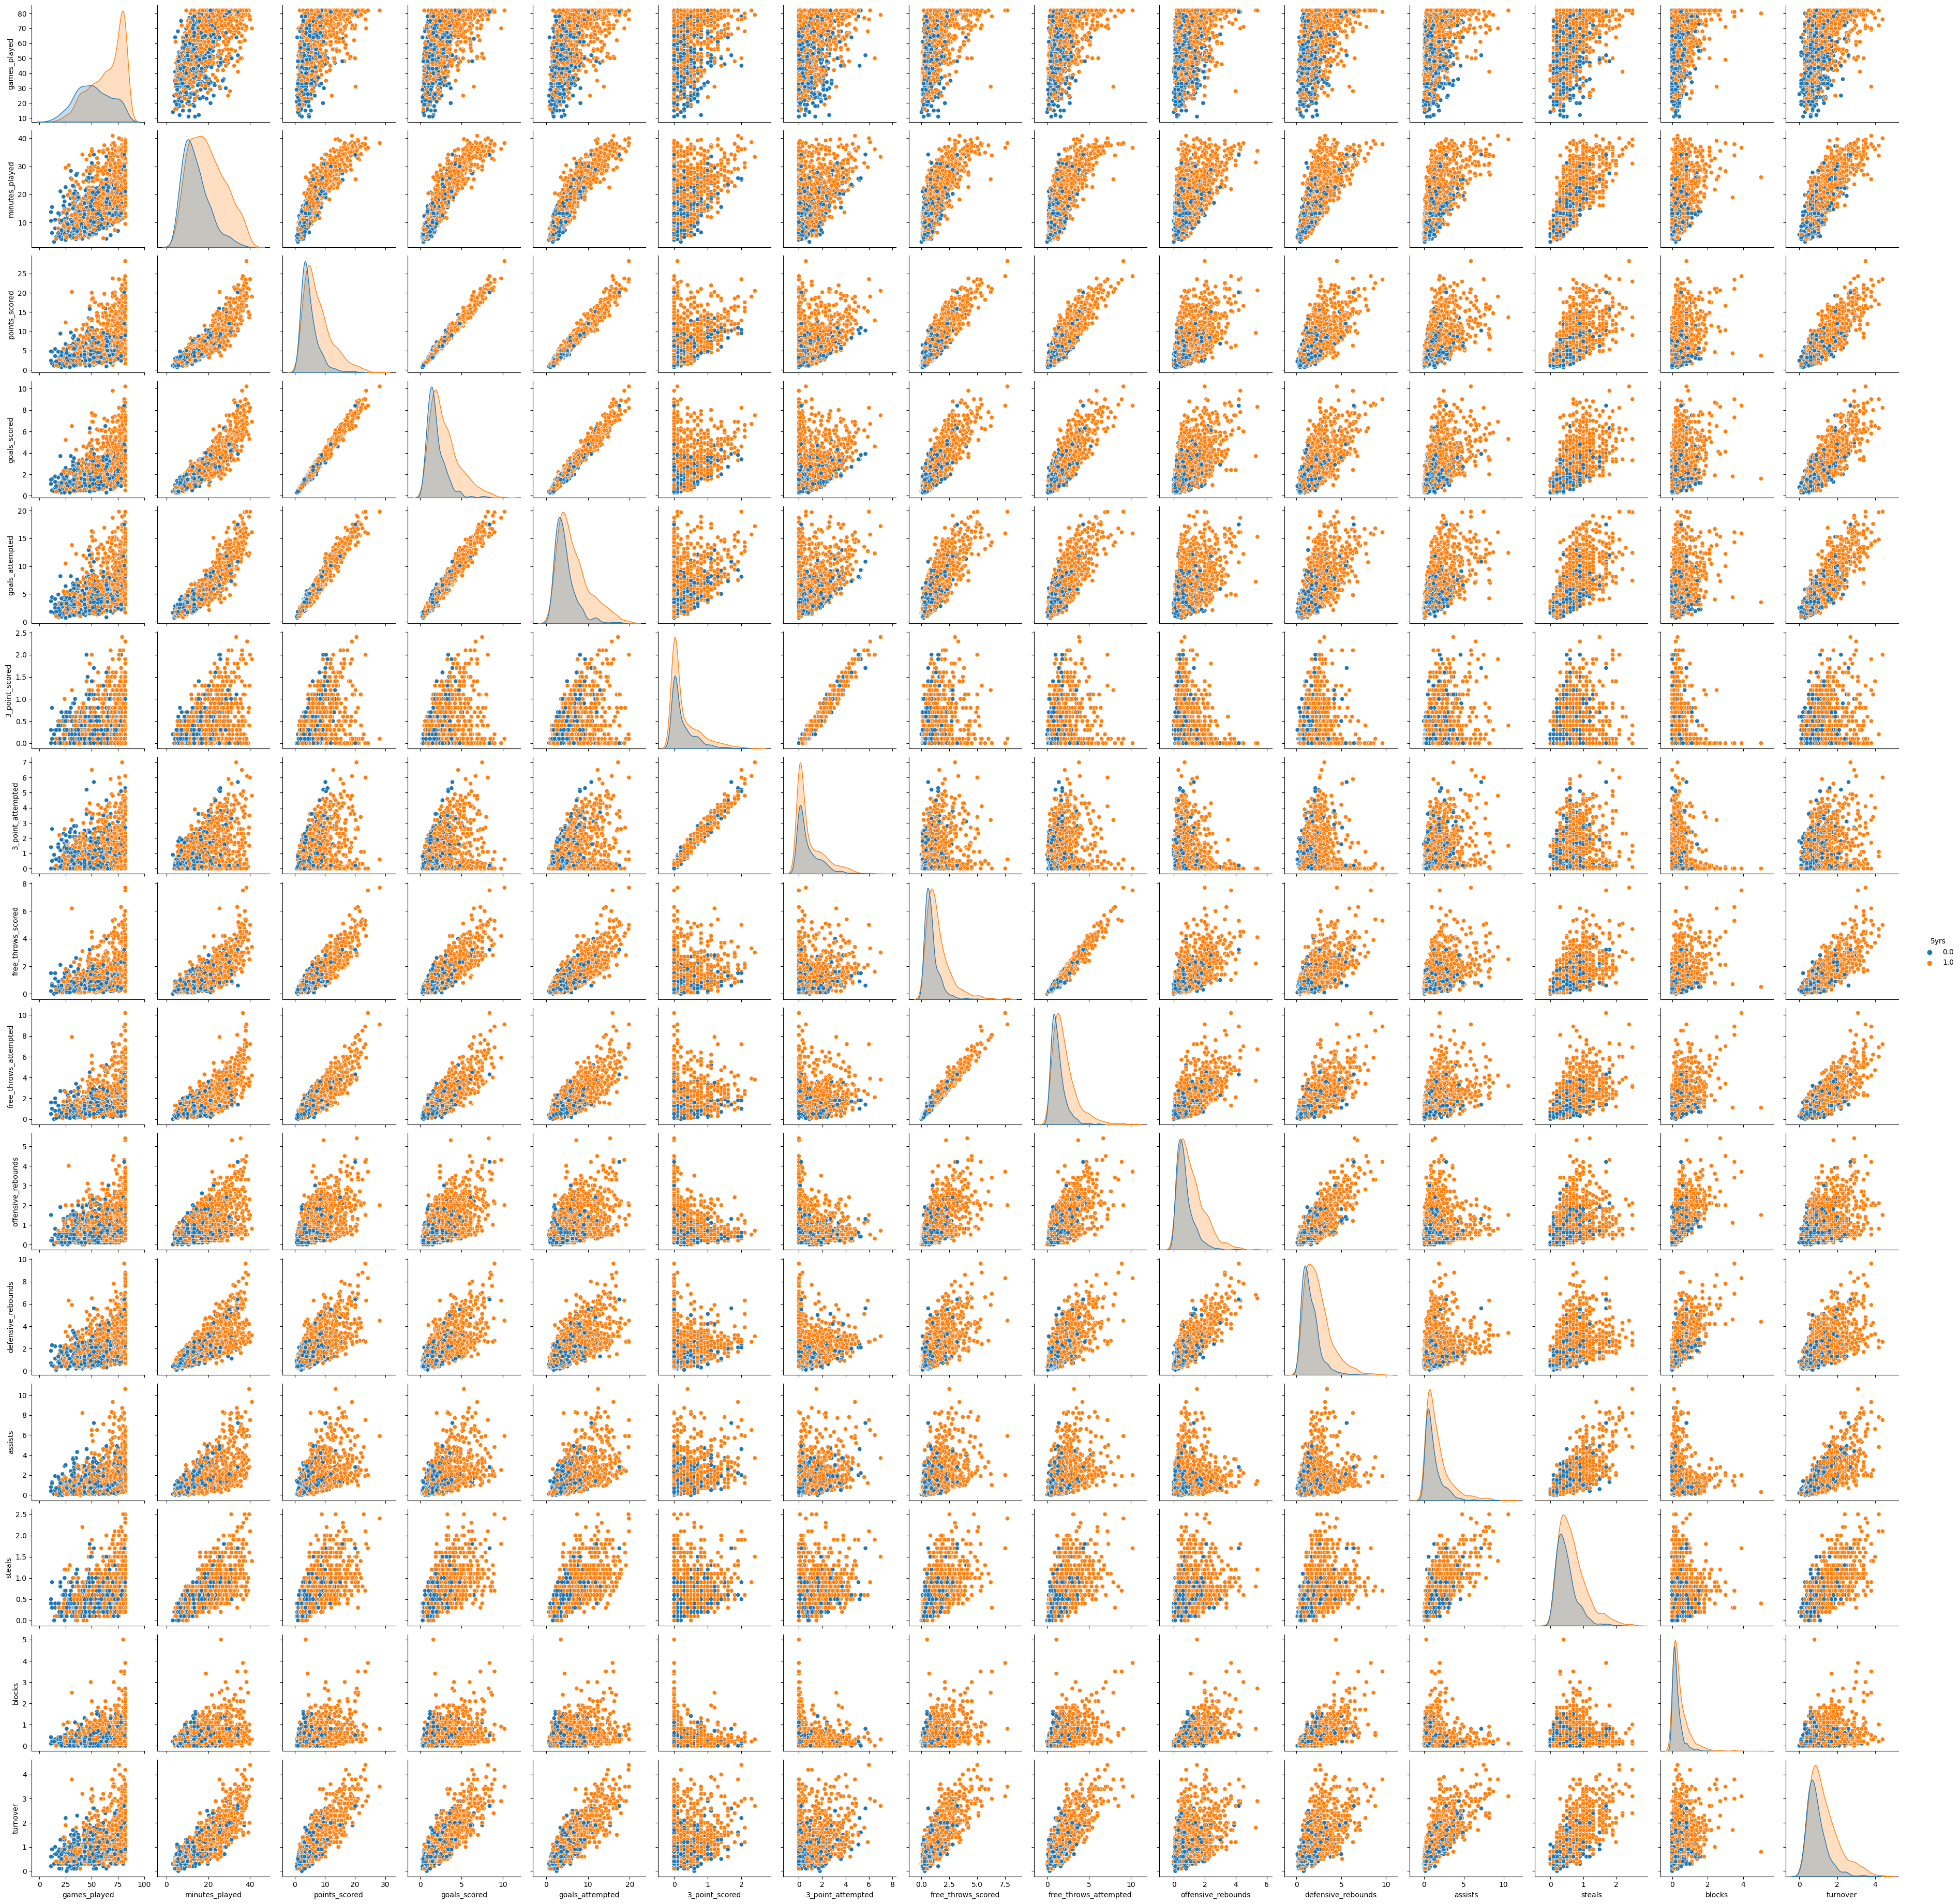

In [260]:
# pairplot
sns.pairplot(df, hue = '5yrs')
plt.show()

# Data Spliting

In [ ]:
# spliting
X = df.drop(['5yrs', 'name'], axis = 1)
y = df['5yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1379, 15)
(1379,)
(591, 15)
(591,)


# Scaling

In [146]:
# Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE

In [147]:
# SMOTE
smote = SMOTE(random_state=100)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1728, 15)
(1728,)


# PCA

In [148]:
pca = PCA(n_components = 7)
pca.fit(X_train)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


# Logistic Regression

In [166]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000, 10000],
}

lr = LogisticRegression()

grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best hyperparameters: ", grid.best_params_)

# lr.fit(X_train_scaled, y_train)
# y_pred_lr = lr.predict(X_test_scaled)
# y_train_pred_lr = lr.predict(X_train_scaled)

# print("Testing Accuracy", accuracy_score(y_test, y_pred_lr))
# print("Training Accuracy", accuracy_score(y_train, y_train_pred_lr))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Best hyperparameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

## Logistic Regression evaluation - I

In [167]:
best_model = grid.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy: ", accuracy)
print("Training Accuracy:", accuracy_score(y_train, best_model.predict(X_train_scaled)))

Testing Accuracy:  0.7072758037225042
Training Accuracy: 0.6976069615663524


## Defining evaluation function

In [177]:
def calculate_metrics(y_true, y_pred, y_pred_prob):
  # Calculate Accuracy
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy Score: {:.2f}".format(accuracy*100))
  # Calculate F1 Score
  f1 = f1_score(y_true, y_pred)
  print("F1 Score: {:.2f}".format(f1*100))
  precision = precision_score(y_true, y_pred)
  # Print Precision
  print("Precision: {:.2f}".format(precision*100))
  # Calculate Recall
  recall = recall_score(y_true, y_pred)
  # Print Recall
  print("Recall: {:.2f}".format(recall*100))
  cm = confusion_matrix(y_true, y_pred)
  # Plot Confusion Matrix
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  # Calculate AUC-ROC Curve
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
  roc_auc = auc(fpr, tpr)
  # Plot AUC-ROC Curve
  plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

## Logistic Regression evaluation - II

Accuracy Score: 0.71
F1 Score: 0.78
Precision: 0.75
Recall: 0.81


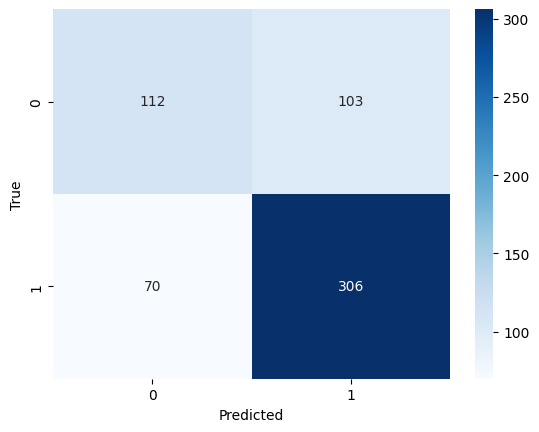

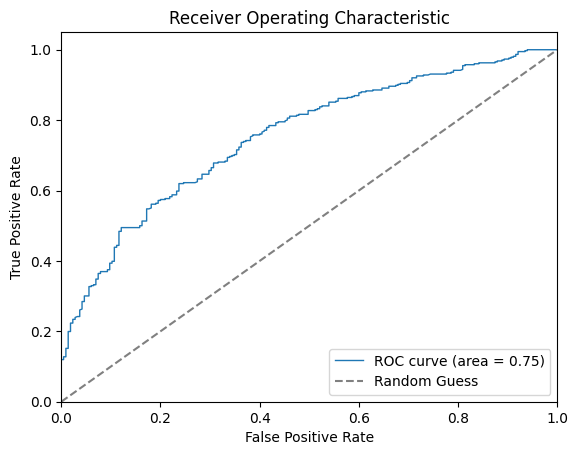

In [168]:
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred, y_pred_proba)

# ADA Boost

In [171]:
adaboost = AdaBoostClassifier(n_estimators= 200, learning_rate=0.01, random_state=100)

adaboost.fit(X_train_scaled, y_train)
y_pred = adaboost.predict(X_test_scaled)
y_train_pred = adaboost.predict(X_train_scaled)

print("Testing Accuracy", accuracy_score(y_test, y_pred))
print("Training Accuracy", accuracy_score(y_train, y_train_pred))

Testing Accuracy 0.6835871404399323
Training Accuracy 0.7070340826686005


## ADA Boosting Evaluation

Accuracy Score: 0.68
F1 Score: 0.76
Precision: 0.73
Recall: 0.79


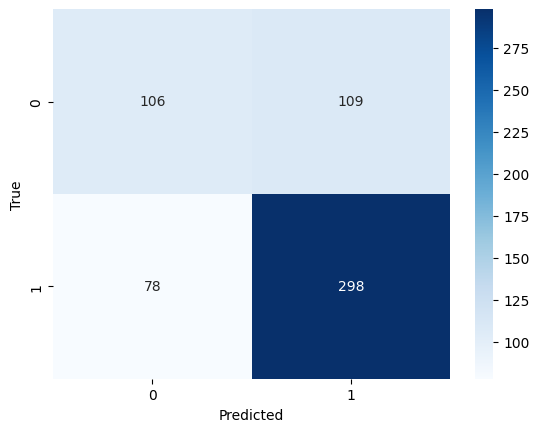

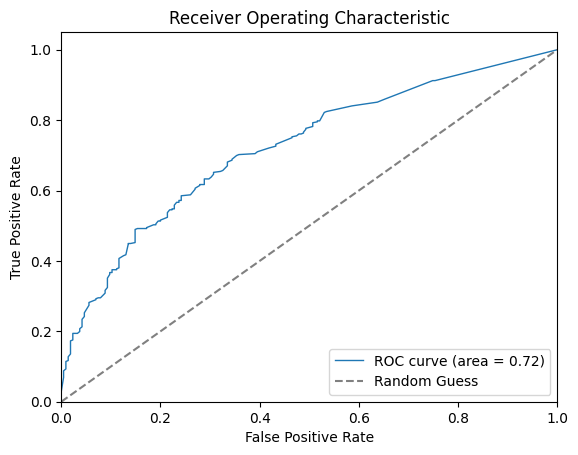

In [172]:
y_pred_proba = adaboost.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred, y_pred_proba)

# Random Forest

In [176]:
# Random Forest
rf = RandomForestClassifier()

# Define hyperparameters to tune
param_dist = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 50),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}
# Define Randomized Search CV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=100,
    n_jobs=-1
)

# Fit Randomized Search CV to training data
rf_random.fit(X_train_scaled, y_train)
# Evaluate performance of best model on testing data
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 68.87%


## Radom Forest Evaluation

Accuracy Score: 68.87
F1 Score: 75.85
Precision: 74.87
Recall: 76.86


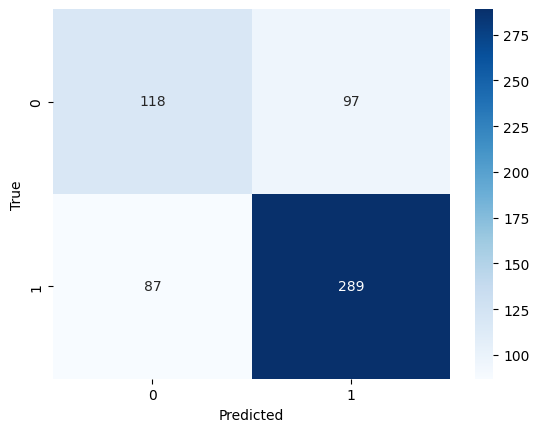

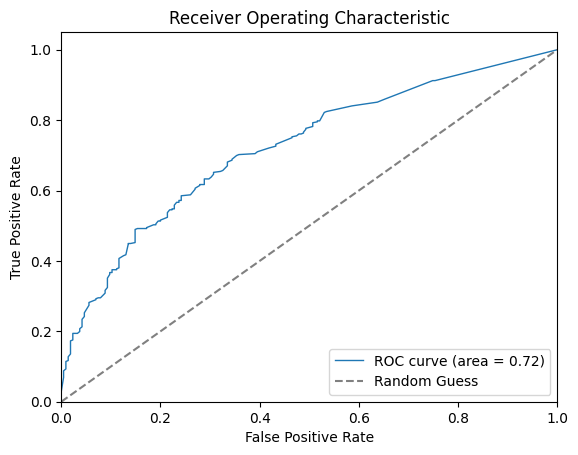

In [178]:
y_pred_proba = adaboost.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred, y_pred_proba)

# Decision Tree

In [179]:
# Decision Tree
dtc = DecisionTreeClassifier(random_state=100)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator from the GridSearchCV
best_dtc = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_dtc.predict(X_test_scaled) # replace X_test with your test set

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) # replace y_test with your test set labels

# Print the best parameters and accuracy
print("Best parameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

Best parameters:  {'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy:  0.6717428087986463


## Decision Tree Evaluation

Accuracy Score: 67.17
F1 Score: 74.47
Precision: 73.70
Recall: 75.27


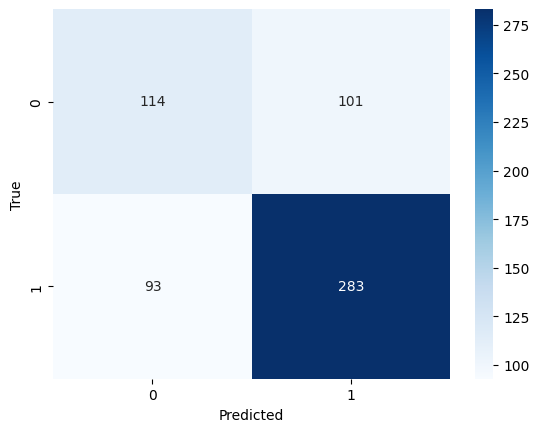

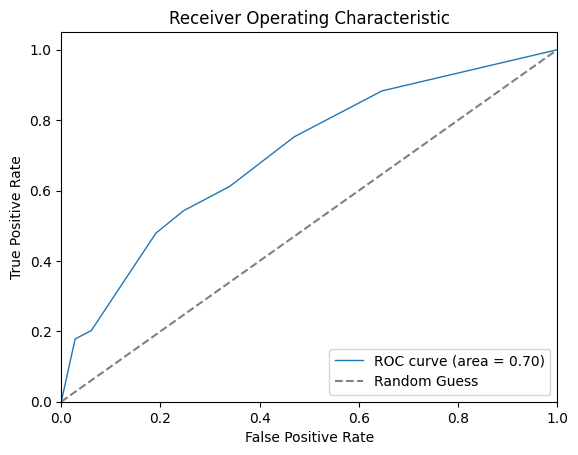

In [180]:
y_pred_proba = best_dtc.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred, y_pred_proba)

## Decision Tree Plot

[Text(0.5, 0.875, 'x[7] <= -0.221\ngini = 0.468\nsamples = 1379\nvalue = [515, 864]'),
 Text(0.25, 0.625, 'x[0] <= -0.092\ngini = 0.499\nsamples = 745\nvalue = [392, 353]'),
 Text(0.125, 0.375, 'x[9] <= -0.445\ngini = 0.475\nsamples = 476\nvalue = [291, 185]'),
 Text(0.0625, 0.125, 'gini = 0.443\nsamples = 305\nvalue = [204, 101]'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 171\nvalue = [87, 84]'),
 Text(0.375, 0.375, 'x[1] <= -0.108\ngini = 0.469\nsamples = 269\nvalue = [101, 168]'),
 Text(0.3125, 0.125, 'gini = 0.497\nsamples = 175\nvalue = [81, 94]'),
 Text(0.4375, 0.125, 'gini = 0.335\nsamples = 94\nvalue = [20, 74]'),
 Text(0.75, 0.625, 'x[0] <= 0.079\ngini = 0.313\nsamples = 634\nvalue = [123, 511]'),
 Text(0.625, 0.375, 'x[3] <= 0.678\ngini = 0.456\nsamples = 148\nvalue = [52, 96]'),
 Text(0.5625, 0.125, 'gini = 0.487\nsamples = 117\nvalue = [49, 68]'),
 Text(0.6875, 0.125, 'gini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.875, 0.375, 'x[9] <= 0.688\ngini = 0.249\nsample

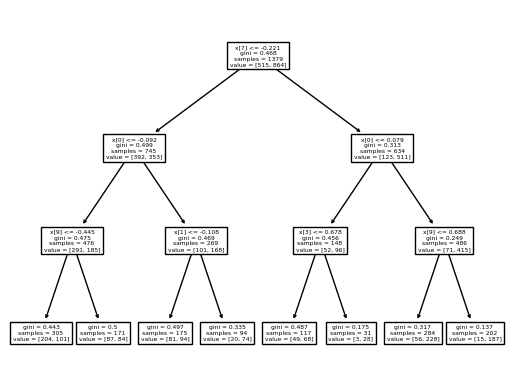

In [181]:
from sklearn import tree
tree.plot_tree(best_dtc)

# ANN

In [198]:
import keras
from keras.models import Sequential
from keras.layers import Dense


np.random.seed(100)
# Create a neural network model
model = Sequential()

# Add dense layers to the model
model.add(Dense(units=32, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_data=(X_test_scaled, y_test))

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Epoch 1/30
22/22 [==============================] - 3s 24ms/step - loss: 0.6965 - accuracy: 0.5149 - val_loss: 0.6370 - val_accuracy: 0.6193
Epoch 2/30
22/22 [==============================] - 0s 9ms/step - loss: 0.6116 - accuracy: 0.6490 - val_loss: 0.6018 - val_accuracy: 0.6582
Epoch 3/30
22/22 [==============================] - 0s 11ms/step - loss: 0.5888 - accuracy: 0.6780 - val_loss: 0.5882 - val_accuracy: 0.6853
Epoch 4/30
22/22 [==============================] - 0s 14ms/step - loss: 0.5786 - accuracy: 0.6831 - val_loss: 0.5804 - val_accuracy: 0.6904
Epoch 5/30
22/22 [==============================] - 0s 5ms/step - loss: 0.5728 - accuracy: 0.6954 - val_loss: 0.5767 - val_accuracy: 0.6971
Epoch 6/30
22/22 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.7020 - val_loss: 0.5735 - val_accuracy: 0.6920
Epoch 7/30
22/22 [==============================] - 0s 7ms/step - loss: 0.5669 - accuracy: 0.7041 - val_loss: 0.5721 - val_accuracy: 0.6904
Epoch 8/30
22/22 

## ANN Evaluation

19/19 [==============================] - 0s 11ms/step
Accuracy Score: 70.05
F1 Score: 76.68
Precision: 75.98
Recall: 77.39


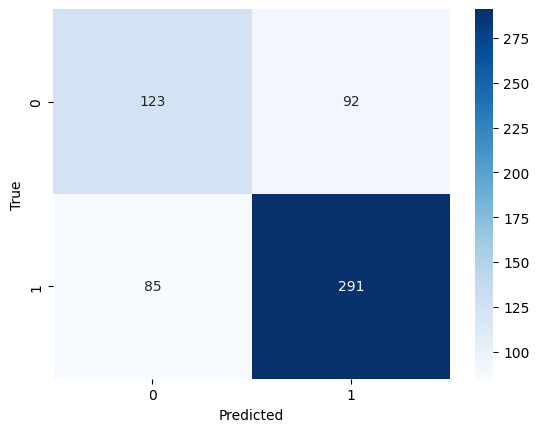

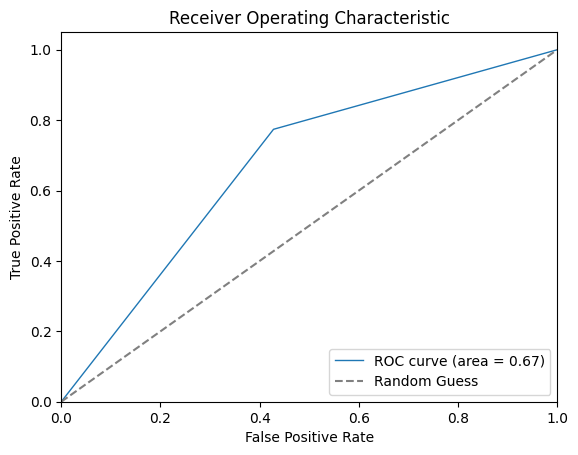

In [204]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)
calculate_metrics(y_test, y_pred, y_pred)

# KNN with SMOTE & Scaling

In [226]:
# KNN with smote & scaling
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = grid_knn.predict(X_test_scaled)
print(f"Best hyperparameters: {grid_knn.best_params_}")

Best hyperparameters: {'n_neighbors': 4, 'weights': 'distance'}


## KNN with scaling & Smote Evaluation

Accuracy Score: 64.13
F1 Score: 69.45
Precision: 75.79
Recall: 64.10


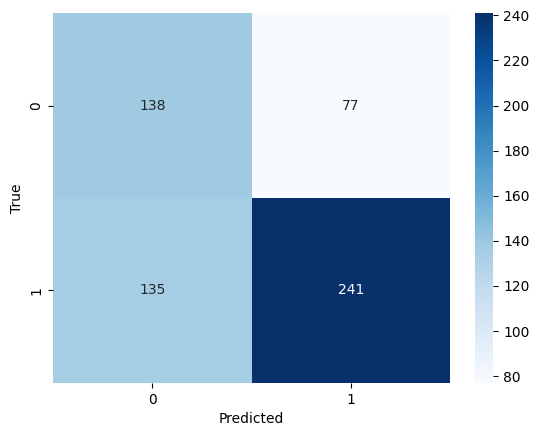

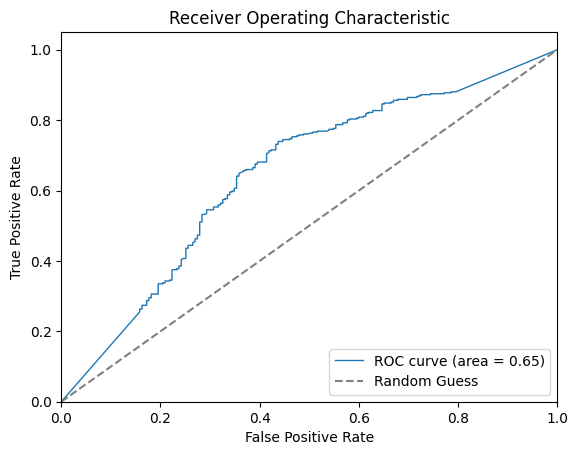

In [227]:
# knn with smote metrics calculation
y_pred_proba = grid_knn.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred_knn, y_pred_proba)

# KNN with scaling without SMOTE

In [221]:
# knn with scaling without smote 
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 10)),
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_knn.fit(X_train_scaled, y_train)
y_pred_knn = grid_knn.predict(X_test_scaled)
print(f"Best hyperparameters: {grid_knn.best_params_}")

Best hyperparameters: {'n_neighbors': 9, 'weights': 'uniform'}


## KNN with scaling without SMOTE Evaluation

Accuracy Score: 70.56
F1 Score: 77.58
Precision: 75.25
Recall: 80.05


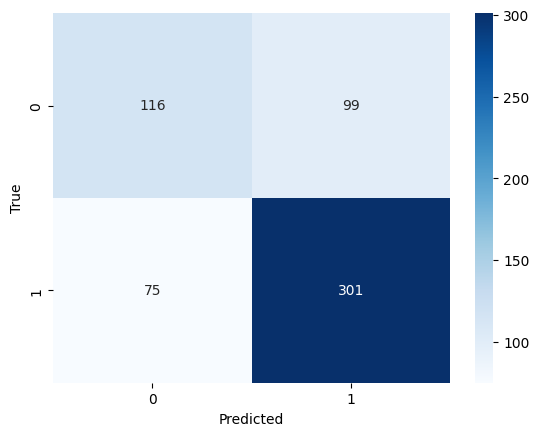

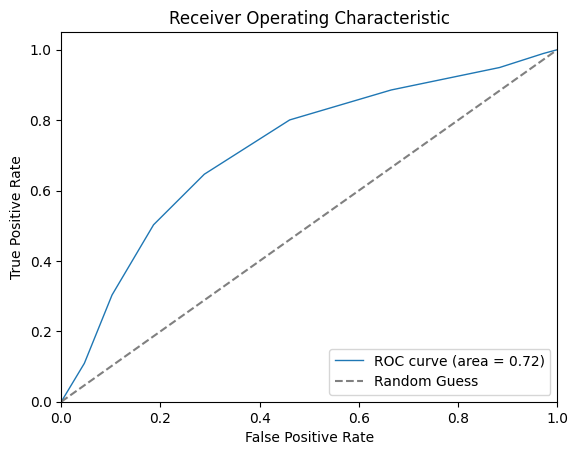

In [222]:
# knn without smote metrics calculation
y_pred_proba = grid_knn.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred_knn, y_pred_proba)

# SVM with scaling & SMOTE

In [231]:
# SVM with smote & scaling

svm_model = SVC(probability=True)
param_grid = {'C': [0.1, 0.01, 0.001,1,10,100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4]}

# define grid search with cross-validation
grid_svm = GridSearchCV(svm_model, param_grid, cv=5)

# fit the model to the data
grid_svm.fit(X_train_resampled,y_train_resampled)
y_pred_svm = grid_svm.predict(X_test_scaled)


# print best hyperparameters and corresponding accuracy score
print(f"Best hyperparameters: {grid_svm.best_params_}")

Best hyperparameters: {'C': 100, 'degree': 2, 'kernel': 'rbf'}


## SVM with scaling & SMOTE Evaluation

Accuracy Score: 63.11
F1 Score: 67.07
Precision: 77.62
Recall: 59.04


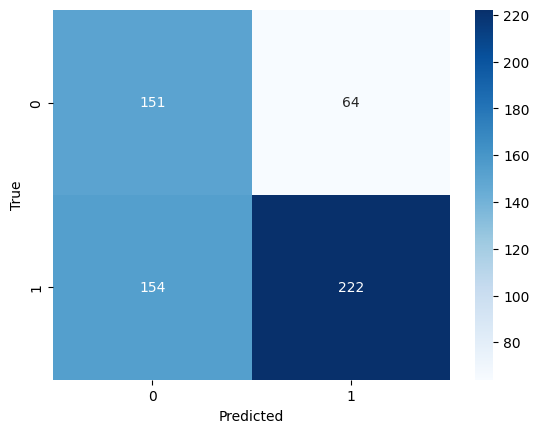

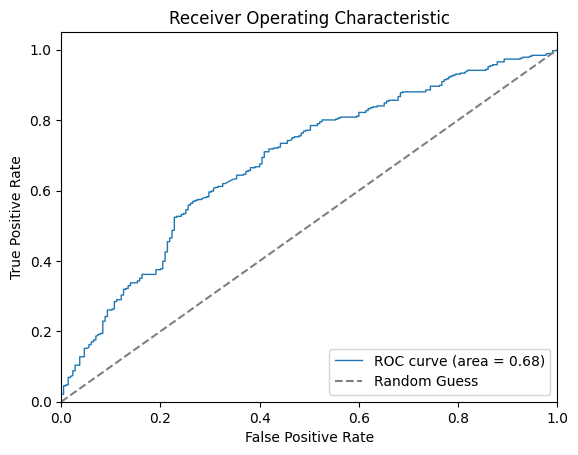

In [233]:
# svm with smote & scaling metrics calculation
y_pred_proba = grid_svm.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred_svm, y_pred_proba)

# SVM with scaling without SMOTE 

In [239]:
# SVM with scaling without smote
svm_model = SVC(probability=True)
param_grid = {'C': [0.1, 0.01, 0.001,1,10,100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4]}

# define grid search with cross-validation
grid_svm = GridSearchCV(svm_model, param_grid, cv=5)

# fit the model to the data
grid_svm.fit(X_train_scaled,y_train)
y_pred_svm = grid_svm.predict(X_test_scaled)


# print best hyperparameters and corresponding accuracy score
print(f"Best hyperparameters: {grid_svm.best_params_}")

Best hyperparameters: {'C': 0.01, 'degree': 2, 'kernel': 'linear'}


## SVM without SMOTE with scaling Evaluation

Accuracy Score: 70.39
F1 Score: 77.24
Precision: 75.57
Recall: 78.99


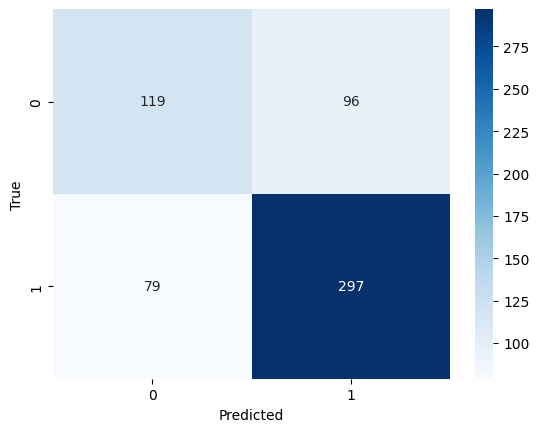

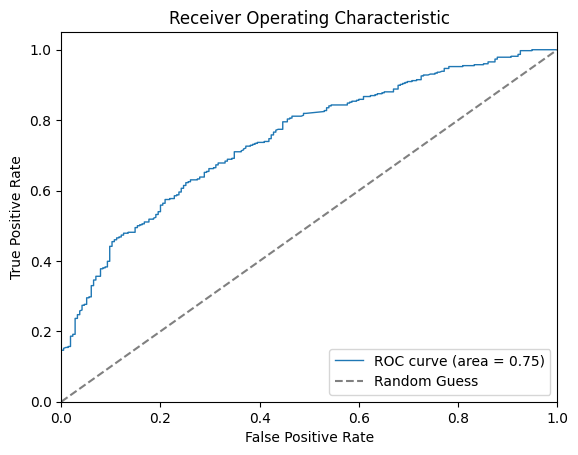

In [240]:
# svm without smote & with scaling metrics calculation
y_pred_proba = grid_svm.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred_svm, y_pred_proba)

# Naive bayes with smote & scaling

In [235]:
# naive bayes with smote & scaling
nb = GaussianNB()
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
y_pred_nb = grid_search.predict(X_test_scaled)

Accuracy Score: 58.71
F1 Score: 58.22
Precision: 81.73
Recall: 45.21


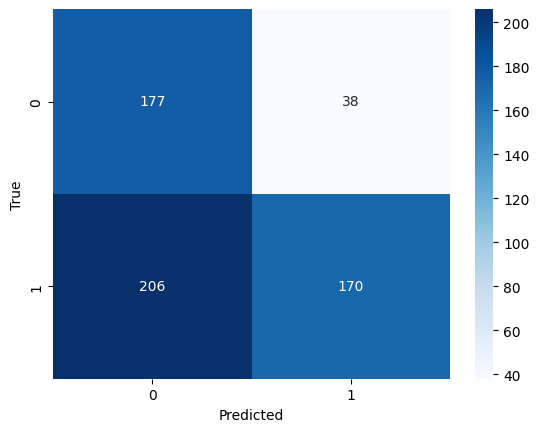

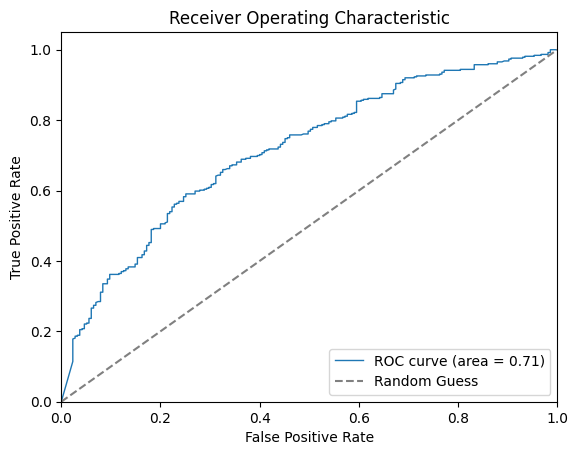

In [236]:
# naive bayes with smote & with scaling metrics calculation
y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred_nb, y_pred_proba)

# Naive bayes without smote &  with scaling

In [237]:
# naive bayes without smote & with scaling
nb = GaussianNB()
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
y_pred_nb = grid_search.predict(X_test_scaled)

## naive bayes without smote & with scaling evaluation

Accuracy Score: 59.39
F1 Score: 59.32
Precision: 81.78
Recall: 46.54


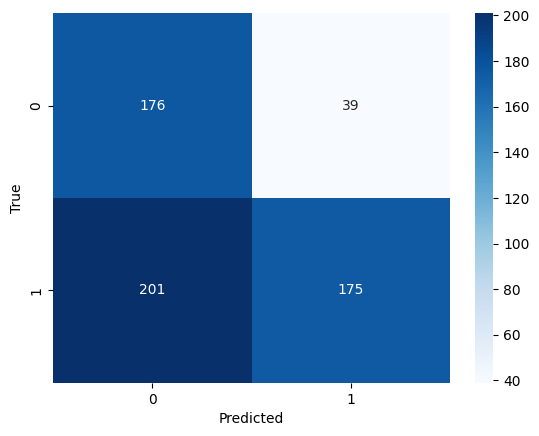

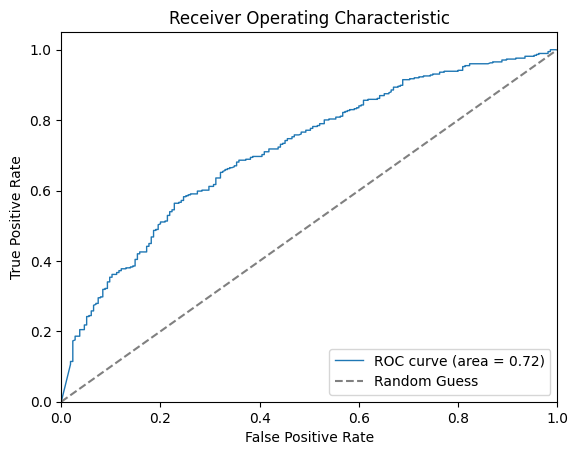

In [238]:
# naive bayes without smote & with scaling metrics calculation
y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]
calculate_metrics(y_test, y_pred_nb, y_pred_proba)